In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# factory soft iron correction
x_scale = 1.23
y_scale = 1.23
z_scale = 1.19

Analyze data saved over serial.

By default, the onboard magnetometer AK8963 runs at 8 Hz and the ADC resolution is 16 bits. We can change it to 100 Hz but not sure how that affects accuracy, precision, or resolution.

In [3]:
data = np.load("magnetometer_data.npy")

In [4]:
data.shape

(486, 3)

In [5]:
data[:5,:]

array([[  13.58,  181.45, -611.19],
       [  13.58,  181.45, -611.19],
       [  22.22,  185.16, -614.77],
       [  22.22,  185.16, -614.77],
       [  30.86,  178.98, -623.11]])

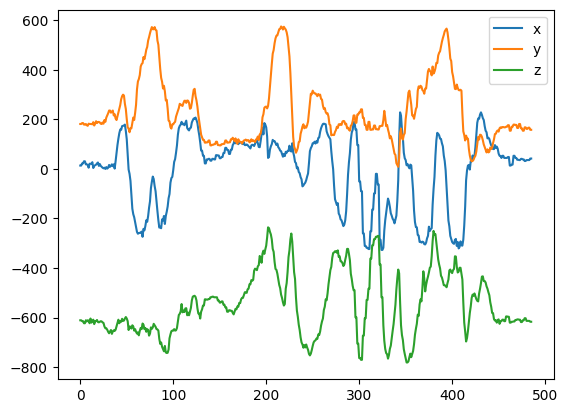

In [6]:
plt.plot(data)
plt.legend(["x","y","z"])

In [7]:
data[:,0] += 70
data[:,1] -= 250
data[:,2] += 600

data[:,0] *= x_scale
data[:,1] *= y_scale
data[:,2] *= z_scale

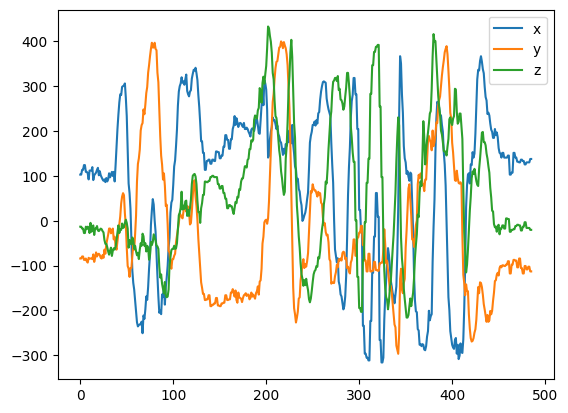

In [8]:
plt.plot(data)
plt.legend(["x", "y", "z"])

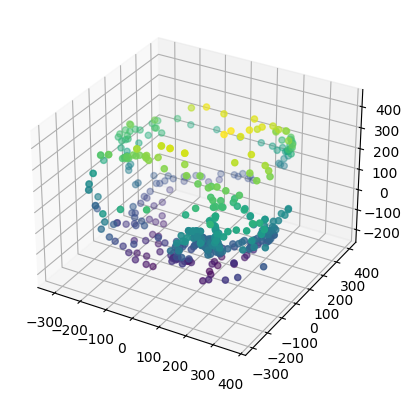

In [9]:
ax = plt.axes(projection="3d")
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=data[:,2], cmap="viridis")

Alright enough visual inspection. Here are some *hard* facts

In [10]:
data = np.load("magnetometer_data.npy")

In [11]:
(max(data[:,0]) + min(data[:,0])) / 2

-49.375

In [12]:
(max(data[:,1]) + min(data[:,1])) / 2

291.93

In [13]:
(max(data[:,2]) + min(data[:,2])) / 2

-508.72999999999996

Here is some weird (spherical?) scale factor calculation

In [14]:
x_amplitude = (max(data[:,0]) - min(data[:,0])) / 2
x_amplitude

277.735

In [15]:
y_amplitude = (max(data[:,1]) - min(data[:,1])) / 2
y_amplitude

283.29

In [16]:
z_amplitude = (max(data[:,2]) - min(data[:,2])) / 2
z_amplitude

272.83

In [17]:
avg_sphere_radius = (x_amplitude + y_amplitude + z_amplitude) / 3
avg_sphere_radius

277.95166666666665

The factory scale is quite good given my modest 500-sample dataset.

In [18]:
x_scale = avg_sphere_radius / x_amplitude
x_scale

1.0007801201385012

In [19]:
y_scale = avg_sphere_radius / y_amplitude
y_scale

0.9811559414969347

In [20]:
z_scale = avg_sphere_radius / z_amplitude
z_scale

1.0187723735170864